In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fits = pd.read_excel('fits.xlsx')
fits_r = pd.read_excel('Fits_ShipmentR_UCSD.xlsx')

In [3]:
#fits dataframe before adjusments
fits_r['Subject #']

0      Sub24651
1      Sub24652
2      Sub24654
3      Sub24655
4      Sub24657
         ...   
250    Sub25444
251    Sub25447
252    Sub25448
253    Sub25449
254    Sub25450
Name: Subject #, Length: 255, dtype: object

In [4]:
fits_r.columns

Index(['RFID', 'Last 5', 'Sex', 'Shipment', 'Coat Color', 'Housing box',
       'Order in box', 'Squad #', 'Box Color', 'Operant Box', 'Subject #',
       's or ns', 'Missing Indifference Point', 'Missing Indiff-Count',
       'Indiff0', 'Indiff2', 'Indiff4', 'Indiff8', 'Indiff16', 'Indiff24',
       'Hyperbolic-k', 'Hyperbolic-ln(k)', 'Hyperbolic-b', 'Hyperbolic-R2',
       'Hyperbolic-Adj. R2 (recoded)', 'Hyperbolic-AIC', 'AUC-traditional',
       'AUC-normal0s', 'Hyperboloid-k', 'Hyperboloid-s', 'Hyperboloid-R2',
       'Hyperboloid-Adj. R2 (recoded)', 'Hyperboloid-AIC', 'Quasi-H-k [beta]',
       'Quasi-H-s [delta]', 'Quasi-H-R2', 'Quasi-H-Adj. R2 (recoded)',
       'Quasi-H-AIC', 'Exponential-k', 'Exponential-R2',
       'Exponential-Adj. R2 (recoded)', 'Exponential-AIC', 'Quadratic-k',
       'Quadratic-R2', 'Quadratic-Adj. R2 (recoded)', 'Quadratic-AIC',
       'Linear-k', 'Linear-R2', 'Linear-Adj. R2 (recoded)', 'Linear-AIC'],
      dtype='object')

In [5]:
#Rename Columns
fits.rename(columns={'Sex': 'sex', 'Shipment': 'cohort','Last 5': 'rfid', 'Coat Color': 'coat_color'
                     ,'Shipping Box': 'shipping_box', 'Housing box': 'housing_box',
                     'Order in box': 'order_in_box', 'Squad #': 'squad_num',
                    'Box Color': 'box_color', 'Operant Box': 'opertant_box','ID-Check': 'id_check',
                     'Subject#': 'subject_num','s or ns': 's_or_ns', 'Missing Indifference Point': 'missing_indiff_point',
                     'Missing Indiff-Count': 'missing_indiff_count', 'Indiff0': 'indiff_0','Indiff2': 'indiff_2',
                     'Indiff4': 'indiff_4','Indiff8': 'indiff_8', 'Indiff16': 'indiff_16','Indiff24': 'indiff_24',
                     'Hyperbolic-k': 'hyperbolic_k', 'Hyperbolic-ln(k)': 'hyperbolic_lnk',
                    'Hyperbolic-b': 'hyperbolic_b','Hyperbolic-R2': 'hyperbolic_R2',
                    'Hyperbolic-Adj. R2 (recoded)': 'hyperbolic_adj_R2','Hyperbolic-AIC': 'hyperbolic_AIC',
                     'AUC-traditional': 'AUC_traditional','AUC-normal0s': 'AUC_normal',
                     'Hyperboloid-k': 'hyperboloid_k','Hyperboloid-s': 'hyperboloid_s','Hyperboloid-R2': 'hyperboloid_R2',
                     'Hyperboloid-Adj. R2 (recoded)': 'hyperboloid_adj_R2','Hyperboloid-AIC': 'hyperboloid_AIC',
                    'Quasi-H-k [beta]': 'quasi_H_k_beta', 'Quasi-H-s [delta]': 'quasi_H_s_delta',
                     'Quasi-H-R2': 'quasi_H_R2', 'Quasi-H-Adj. R2 (recoded)': 'quasi_H_adj_R2',
                    'Quasi-H-AIC': 'quasi_H_AIC', 'Exponential-k': 'expon_k','Exponential-R2': 'expon_R2',
                     'Exponential-Adj. R2 (recoded)': 'expon_adj_R2','Exponential-AIC': 'expon_AIC','Quadratic-k': 'quad_k',
                    'Quadratic-R2': 'quad_R2','Quadratic-Adj. R2 (recoded)': 'quad_adj_R2','Quadratic-AIC': 'quad_AIC',
                    'Linear-k': 'linear_k','Linear-R2': 'linear_R2','Linear-Adj. R2 (recoded)': 'linear_adj_R2','Linear-AIC': 'linear_AIC',}, inplace=True)

In [6]:
#Rename Columns
fits_r.rename(columns={'RFID':'rfid','Sex': 'sex', 'Shipment': 'cohort','Last 5': 'last_5', 'Coat Color': 'coat_color'
                     ,'Shipping Box': 'shipping_box', 'Housing box': 'housing_box',
                     'Order in box': 'order_in_box', 'Squad #': 'squad_num',
                    'Box Color': 'box_color', 'Operant Box': 'opertant_box','ID-Check': 'id_check',
                     'Subject#': 'subject_num','s or ns': 's_or_ns', 'Missing Indifference Point': 'missing_indiff_point',
                     'Missing Indiff-Count': 'missing_indiff_count', 'Indiff0': 'indiff_0','Indiff2': 'indiff_2',
                     'Indiff4': 'indiff_4','Indiff8': 'indiff_8', 'Indiff16': 'indiff_16','Indiff24': 'indiff_24',
                     'Hyperbolic-k': 'hyperbolic_k', 'Hyperbolic-ln(k)': 'hyperbolic_lnk',
                    'Hyperbolic-b': 'hyperbolic_b','Hyperbolic-R2': 'hyperbolic_R2',
                    'Hyperbolic-Adj. R2 (recoded)': 'hyperbolic_adj_R2','Hyperbolic-AIC': 'hyperbolic_AIC',
                     'AUC-traditional': 'AUC_traditional','AUC-normal0s': 'AUC_normal',
                     'Hyperboloid-k': 'hyperboloid_k','Hyperboloid-s': 'hyperboloid_s','Hyperboloid-R2': 'hyperboloid_R2',
                     'Hyperboloid-Adj. R2 (recoded)': 'hyperboloid_adj_R2','Hyperboloid-AIC': 'hyperboloid_AIC',
                    'Quasi-H-k [beta]': 'quasi_H_k_beta', 'Quasi-H-s [delta]': 'quasi_H_s_delta',
                     'Quasi-H-R2': 'quasi_H_R2', 'Quasi-H-Adj. R2 (recoded)': 'quasi_H_adj_R2',
                    'Quasi-H-AIC': 'quasi_H_AIC', 'Exponential-k': 'expon_k','Exponential-R2': 'expon_R2',
                     'Exponential-Adj. R2 (recoded)': 'expon_adj_R2','Exponential-AIC': 'expon_AIC','Quadratic-k': 'quad_k',
                    'Quadratic-R2': 'quad_R2','Quadratic-Adj. R2 (recoded)': 'quad_adj_R2','Quadratic-AIC': 'quad_AIC',
                    'Linear-k': 'linear_k','Linear-R2': 'linear_R2','Linear-Adj. R2 (recoded)': 'linear_adj_R2','Linear-AIC': 'linear_AIC',}, inplace=True)
fits_r.drop(['Subject #'], axis=1, inplace=True)



In [7]:
fits_r.columns

Index(['rfid', 'last_5', 'sex', 'cohort', 'coat_color', 'housing_box',
       'order_in_box', 'squad_num', 'box_color', 'opertant_box', 's_or_ns',
       'missing_indiff_point', 'missing_indiff_count', 'indiff_0', 'indiff_2',
       'indiff_4', 'indiff_8', 'indiff_16', 'indiff_24', 'hyperbolic_k',
       'hyperbolic_lnk', 'hyperbolic_b', 'hyperbolic_R2', 'hyperbolic_adj_R2',
       'hyperbolic_AIC', 'AUC_traditional', 'AUC_normal', 'hyperboloid_k',
       'hyperboloid_s', 'hyperboloid_R2', 'hyperboloid_adj_R2',
       'hyperboloid_AIC', 'quasi_H_k_beta', 'quasi_H_s_delta', 'quasi_H_R2',
       'quasi_H_adj_R2', 'quasi_H_AIC', 'expon_k', 'expon_R2', 'expon_adj_R2',
       'expon_AIC', 'quad_k', 'quad_R2', 'quad_adj_R2', 'quad_AIC', 'linear_k',
       'linear_R2', 'linear_adj_R2', 'linear_AIC'],
      dtype='object')

In [8]:
fits.columns


Index(['sex', 'cohort', 'rfid', 'coat_color', 'shipping_box', 'housing_box',
       'order_in_box', 'squad_num', 'box_color', 'opertant_box', 'id_check',
       'subject_num', 's_or_ns', 'missing_indiff_point',
       'missing_indiff_count', 'indiff_0', 'indiff_2', 'indiff_4', 'indiff_8',
       'indiff_16', 'indiff_24', 'hyperbolic_k', 'hyperbolic_lnk',
       'hyperbolic_b', 'hyperbolic_R2', 'hyperbolic_adj_R2', 'hyperbolic_AIC',
       'AUC_traditional', 'AUC_normal', 'hyperboloid_k', 'hyperboloid_s',
       'hyperboloid_R2', 'hyperboloid_adj_R2', 'hyperboloid_AIC',
       'quasi_H_k_beta', 'quasi_H_s_delta', 'quasi_H_R2', 'quasi_H_adj_R2',
       'quasi_H_AIC', 'expon_k', 'expon_R2', 'expon_adj_R2', 'expon_AIC',
       'quad_k', 'quad_R2', 'quad_adj_R2', 'quad_AIC', 'linear_k', 'linear_R2',
       'linear_adj_R2', 'linear_AIC'],
      dtype='object')

In [9]:
#Change the last 5 numbers of RFID to include entire number
#cohort_list_1 = ['C01','C02','C03','C04']
#cohort_list_2 = ['C05','C06','C07']
#for i in cohort_list_1:
    #fits.loc[(fits.cohort == i),'rfid'] = '9330003200' + fits['rfid'].astype(str)
fits['last_5'] = fits['rfid'].astype(str)
fits['rfid'] = '9330003200' + fits['rfid'].astype(str)
#for i in cohort_list_2:
    #fits.loc[(fits.cohort == i),'rfid'] = '9330003201' + fits['rfid'].astype(str)

In [10]:
#Change shipment values to be in the C0 cohort format
fits['cohort'] = 'C0' + fits['cohort'].astype(str)
fits_r['cohort'] = 'C07'

In [11]:
fits = pd.concat([fits,fits_r])
fits

,sex,cohort,rfid,coat_color,shipping_box,housing_box,order_in_box,squad_num,box_color,opertant_box,...,expon_AIC,quad_k,quad_R2,quad_adj_R2,quad_AIC,linear_k,linear_R2,linear_adj_R2,linear_AIC,last_5
0,M,C02,933000320045751,BRN HOOD,5.0,40,2,4,BLUE,8,...,36.342187,0.272698,-1.349954,0.000000,50.562703,6.678471,-0.035885,0.000000,45.647864,45751
1,F,C02,933000320045756,BLACK,11.0,54,2,5,BLUE,12,...,42.756235,0.259993,-5.508170,0.000000,50.962255,6.338652,-2.516639,0.000000,47.268939,45756
2,F,C02,933000320045757,BRN HOOD,11.0,18,2,2,BLUE,12,...,42.401441,0.262557,-4.489528,0.000000,52.609082,6.564409,-2.148642,0.000000,49.273856,45757
3,F,C02,933000320045759,BRN HOOD,10.0,52,2,5,BLUE,8,...,32.324584,0.265759,0.378190,0.222737,45.981682,6.163581,0.814850,0.768562,38.712880,45759
4,M,C02,933000320045760,BROWN,5.0,39,2,4,BLUE,6,...,35.471797,0.247963,0.533578,0.416973,44.955831,5.690875,0.833890,0.792363,38.761188,45760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,F,C07,933000320125444,BROWN,NaN,64,2,2,G,8,...,49.577016,0.070260,0.051852,0.000000,49.500180,1.403910,0.041626,0.000000,49.564544,25444
251,M,C07,933000320125447,BROWN,NaN,98,1,6,R,1,...,39.522529,0.243508,0.236204,0.045254,45.572286,5.551793,0.630579,0.538223,41.214107,25447
252,M,C07,933000320125448,BRN HOOD,NaN,79,1,6,G,3,...,38.875403,0.217617,0.531391,0.414238,44.652717,4.985923,0.770860,0.713576,40.360087,25448
253,F,C07,933000320125449,BRN HOOD,NaN,99,1,6,R,3,...,41.693131,0.227048,-1.020844,0.000000,49.161053,5.523293,-0.080424,0.000000,45.404084,25449


In [12]:
#Make colors uniform
before_colors = fits.coat_color.unique()
#Black Hood
fits.replace(to_replace =["BLK HOOD", "BLACK HOOD","BLK HHOD"], 
                            value ="black_hood",inplace = True)
#Brown Hood
fits.replace(to_replace =["BRN HOOD", "BROWN HOOD"], 
                            value ="brown_hood",inplace = True)
#Black
fits.replace(to_replace =["BLACK"], 
                            value ="black",inplace = True)
#Brown
fits.replace(to_replace =["BROWN", "BROWN "], 
                            value ="brown",inplace = True)
#Albino
fits.replace(to_replace =["ALBINO"], 
                            value ="albino",inplace = True)
after_colors = fits.coat_color.unique()
print("Before Colors: ",before_colors)
print("After Colors: ",after_colors)


Before Colors:  ['BRN HOOD' 'BLACK' 'BROWN' 'BLK HOOD' 'ALBINO' 'BROWN HOOD' 'BLACK HOOD'
 'BROWN ' 'BLK HHOD' nan]
After Colors:  ['brown_hood' 'black' 'brown' 'black_hood' 'albino' nan]


In [13]:
#Change sex and box_color columns to lower case
fits['sex'] = fits['sex'].str.lower()
fits['box_color'] = fits['box_color'].str.lower()
#fits.box_color.unique()

In [15]:
def drop(fits):
    fits = fits.drop(['missing_indiff_point',
 'missing_indiff_count',
 'hyperbolic_R2',
 'hyperbolic_adj_R2',
 'hyperbolic_AIC',
 'hyperboloid_k',
 'hyperboloid_s',
 'hyperboloid_R2',
 'hyperboloid_adj_R2',
 'hyperboloid_AIC',
 'quasi_H_R2',
 'quasi_H_adj_R2',
 'quasi_H_AIC',
 'expon_R2',
 'expon_adj_R2',
 'expon_AIC',
 'quad_k',
 'quad_R2',
 'quad_adj_R2',
 'quad_AIC',
 'linear_k',
 'linear_R2',
 'linear_adj_R2',
 'linear_AIC',
 'last_5'], axis=1)
    return fits

fits = drop(fits)

In [16]:
#Fits dataframe with adjustments
list(fits.columns.values)

['sex',
 'cohort',
 'rfid',
 'coat_color',
 'shipping_box',
 'housing_box',
 'order_in_box',
 'squad_num',
 'box_color',
 'opertant_box',
 'id_check',
 'subject_num',
 's_or_ns',
 'indiff_0',
 'indiff_2',
 'indiff_4',
 'indiff_8',
 'indiff_16',
 'indiff_24',
 'hyperbolic_k',
 'hyperbolic_lnk',
 'hyperbolic_b',
 'AUC_traditional',
 'AUC_normal',
 'quasi_H_k_beta',
 'quasi_H_s_delta',
 'expon_k']

In [17]:
fits = fits.replace('A', np.NaN, regex=True)
fits = fits.replace('NaN', np.NaN, regex=True)
fits['indiff_2'].value_counts()
df = fits[fits['indiff_24'].notnull()]
#df = fits.loc[fits['indiff_24'].isnull() == False] 
#df = fits[fits.indiff_24 != 'NaN']
df

,sex,cohort,rfid,coat_color,shipping_box,housing_box,order_in_box,squad_num,box_color,opertant_box,...,indiff_16,indiff_24,hyperbolic_k,hyperbolic_lnk,hyperbolic_b,AUC_traditional,AUC_normal,quasi_H_k_beta,quasi_H_s_delta,expon_k
0,m,C02,933000320045751,brown_hood,5.0,40,2,4,blue,8,...,22.286333,30.258215,0.152786,-1.878717,0.794732,0.319148,0.401579,0.815571,0.905189,0.142229
1,f,C02,933000320045756,black,11.0,54,2,5,blue,12,...,37.152422,31.230381,0.083817,-2.479118,0.640505,0.353315,0.55162,0.595001,0.952806,0.132028
2,f,C02,933000320045757,brown_hood,11.0,18,2,2,blue,12,...,42.058929,29.908862,0.249252,-1.389293,0.796148,0.31285,0.392955,0.409958,0.971604,0.243264
3,f,C02,933000320045759,brown_hood,10.0,52,2,5,blue,8,...,31.810227,26.974896,0.151994,-1.883917,1.068606,0.431175,0.403493,0.987392,0.921055,0.083836
4,m,C02,933000320045760,brown,5.0,39,2,4,blue,6,...,45.685779,31.55022,0.172621,-1.756656,1.229121,0.498878,0.405882,1.008066,0.931037,0.070533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,f,C07,933000320125444,brown,NaN,64,2,2,g,8,...,118.331151,116.03381,0.062751,-2.768579,1.526618,0.934859,0.612373,1.364846,0.968620,0.010123
251,m,C07,933000320125447,brown,NaN,98,1,6,r,1,...,53.837144,29.543342,0.141150,-1.957933,1.089611,0.509774,0.46785,0.763319,0.958463,0.067624
252,m,C07,933000320125448,brown_hood,NaN,79,1,6,g,3,...,67.176314,43.908693,0.123032,-2.095309,1.191596,0.564164,0.473452,1.117729,0.934600,0.055560
253,f,C07,933000320125449,brown_hood,NaN,99,1,6,r,3,...,69.633217,39.273675,0.191592,-1.652388,1.022319,0.45875,0.448735,0.574618,0.974426,0.089757


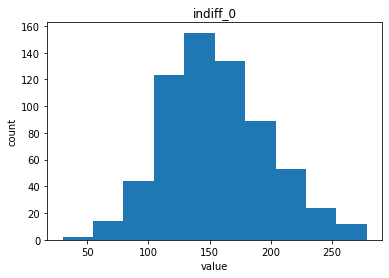

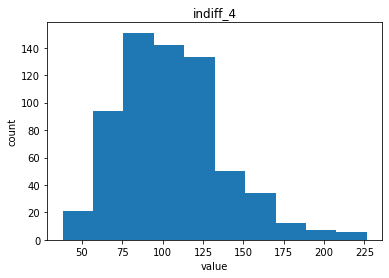

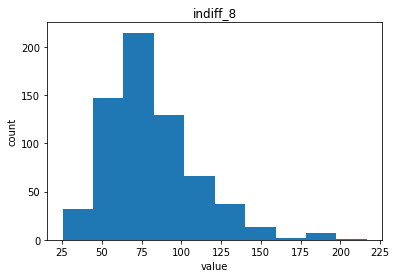

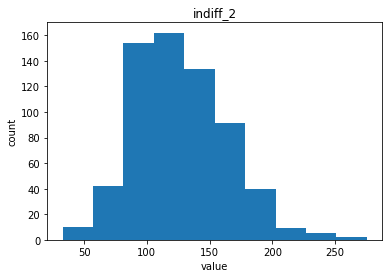

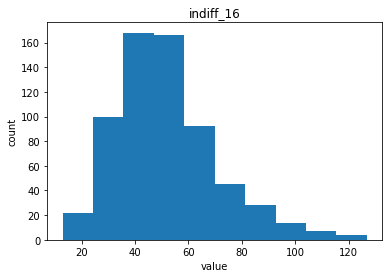

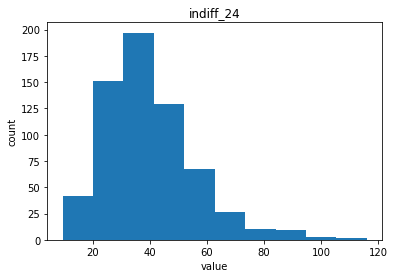

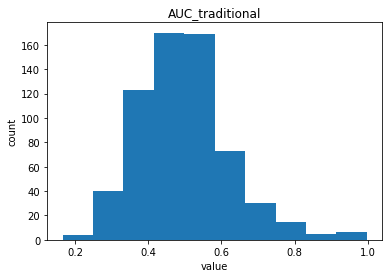

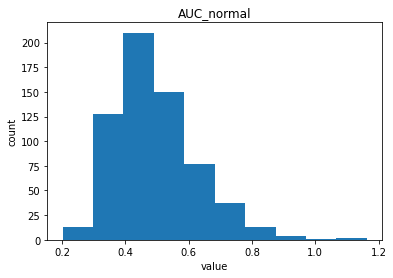

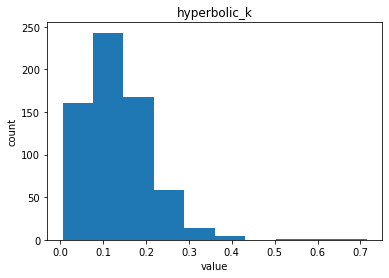

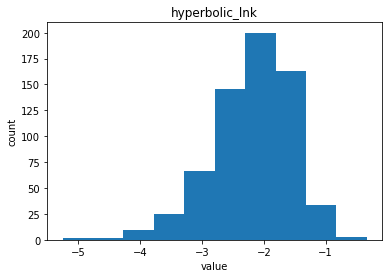

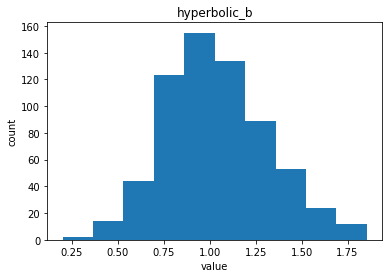

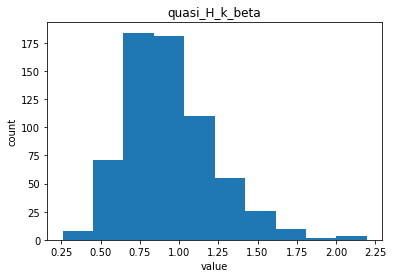

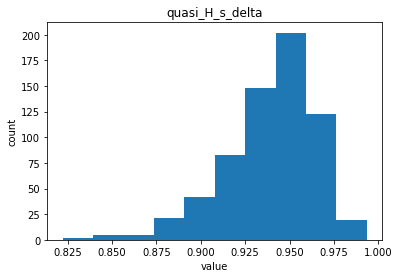

In [18]:
graph_columns = ['indiff_0','indiff_4',
                 'indiff_8','indiff_2','indiff_16','indiff_24','AUC_traditional','AUC_normal',
                 'hyperbolic_k','hyperbolic_lnk','hyperbolic_b',
                 'quasi_H_k_beta','quasi_H_s_delta']
#removed following object_columns for graphing
#object_columns = ['indiff_2','indiff_16','indiff_24','AUC_traditional','AUC_normal']
#for col in object_columns:
#    fits[col] = pd.to_numeric(fits[col], downcast="float")
for col in graph_columns:
    #df = fits[fits[col].notna()]
    df = fits[fits[col].notnull()]
    plt.title(col)
    plt.xlabel('value')
    plt.ylabel('count')
    plt.hist(df[col])
    plt.show() 



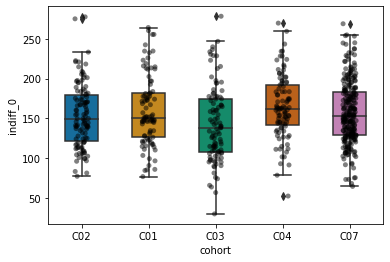

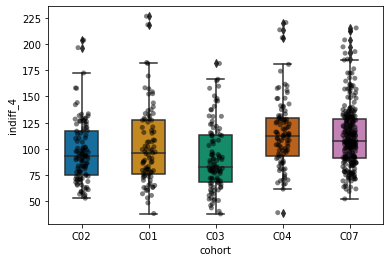

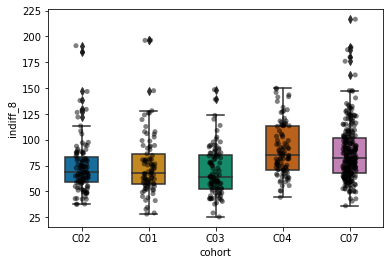

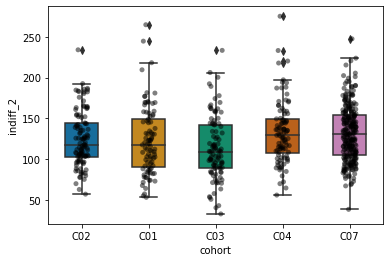

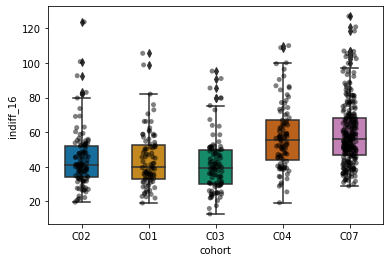

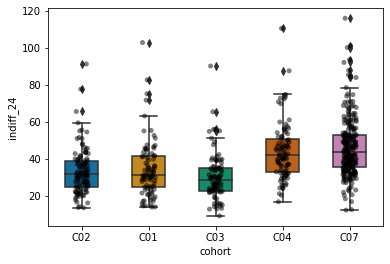

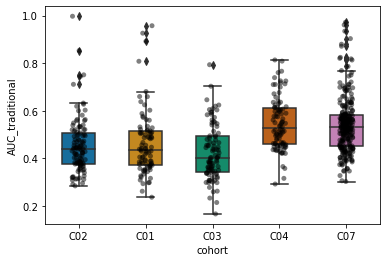

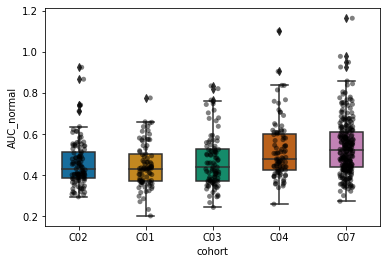

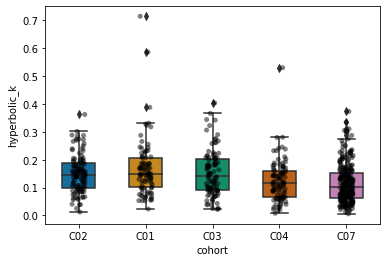

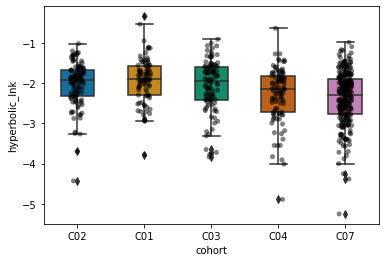

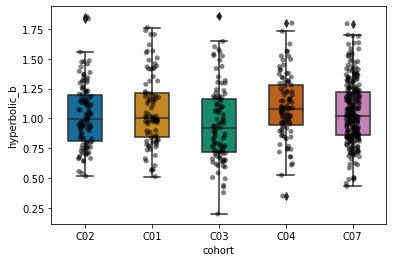

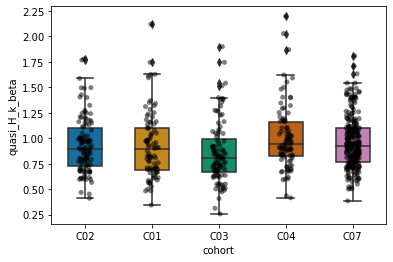

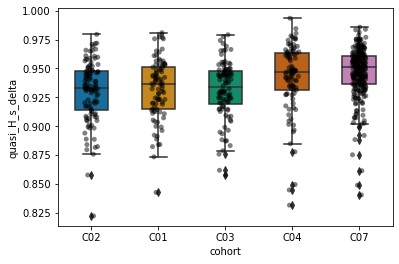

In [19]:
for col in graph_columns:
    df = fits[fits[col].notnull()]
    sns.boxplot(y = col, x ='cohort', 
                     data = df, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='cohort',
                        data=df, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()
#fits.dtypes
#fits.AUC_traditional.unique()

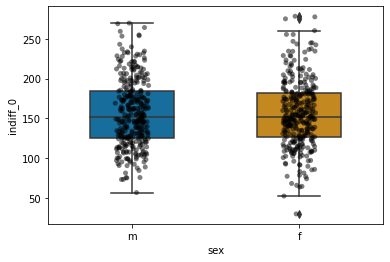

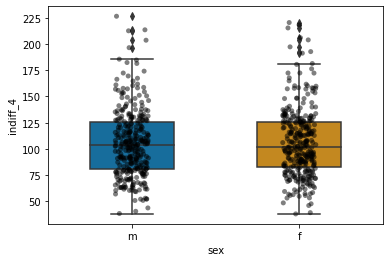

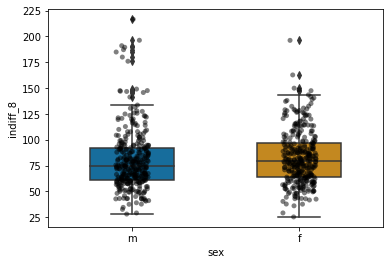

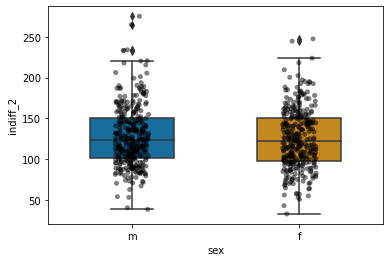

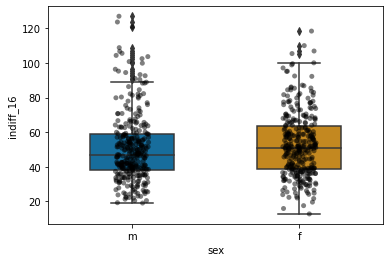

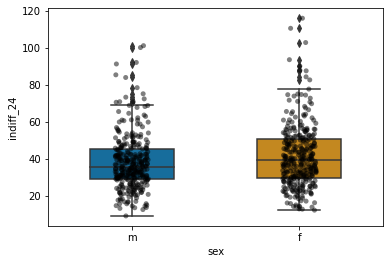

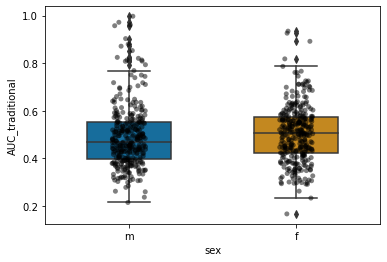

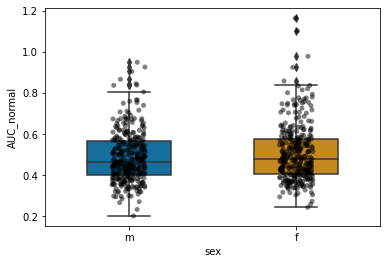

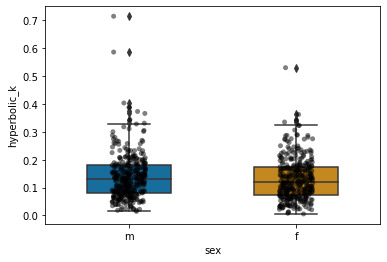

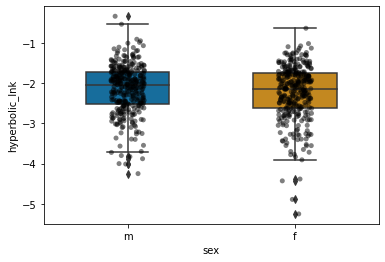

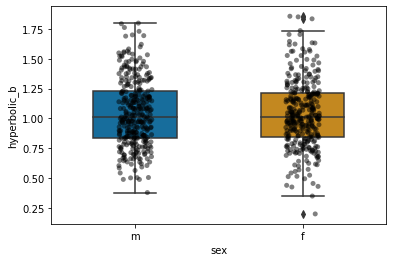

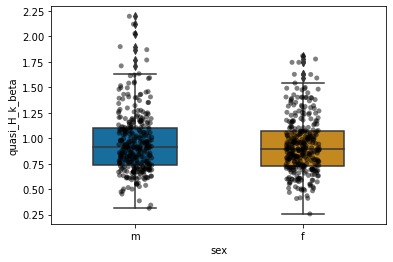

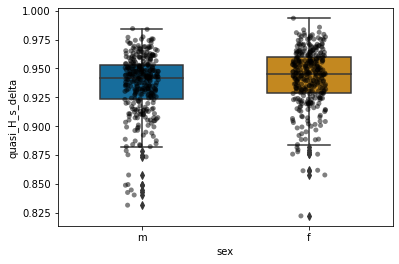

In [20]:
for col in graph_columns:
    df = fits[fits[col].notnull()]
    sns.boxplot(y = col, x ='sex', 
                     data = df, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='sex',
                        data=df, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()

In [21]:
fits_missing = fits[(fits == 'A').any(axis=1)]
fits_missing

,sex,cohort,rfid,coat_color,shipping_box,housing_box,order_in_box,squad_num,box_color,opertant_box,...,indiff_16,indiff_24,hyperbolic_k,hyperbolic_lnk,hyperbolic_b,AUC_traditional,AUC_normal,quasi_H_k_beta,quasi_H_s_delta,expon_k


In [22]:
#fits_missing.to_csv('fits_missing.csv', index=False)

In [25]:
#fits.to_csv(r'C:\Users\cocoy\Dropbox (Palmer Lab)\Palmer Lab\Shae Ziegler\Suzanne_Mitchell_U01\fits.csv', index=False)
#fits.to_csv(r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01/fits.csv', index=False)


In [24]:
fits.cohort.value_counts()

C07    255
C02    110
C03    100
C04     96
C01     89
Name: cohort, dtype: int64